
<b>INSTITUTO FEDERAL DE GOIÁS<br/>
PÓS-GRADUAÇÃO EM INTELIGÊNCIA ARTIFICIAL APLICADA<br/></b>
Disciplina: Processamento de Linguagem Natural  <br/>
Professor: Daniel Xavier de Sousa <br/>
Alunos: Wagner Silva, Cleibson, Marcos Rodrigues


---



Importação de bibliotecas básicas

In [2]:
import pandas as pd
import numpy as np
#from google.colab import drive
import re

Montando driver

In [7]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Extraindo dataset

In [8]:
!unzip "/content/drive/MyDrive/5 - Trabalho PLN/buscape.csv.zip"

Archive:  /content/drive/MyDrive/5 - Trabalho PLN/buscape.csv.zip
replace buscape.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Leitura do dataset

In [4]:
dados = pd.read_csv('./buscape.csv')

Verificando tipo do dataset

In [5]:
type(dados)

pandas.core.frame.DataFrame

Informações do Dataset original

In [6]:
dados.shape

(84991, 8)

Tarefa: Classificação de avaliações de clientes </br>
Polaridade definidas nas avaliações: </br>
Rating: 4 e 5 avaliação positiva </br>
Rating: 1 e 2 avaliação negativa </br>
Rating: 3 descartadas </br>


---




Observamos que existem as colunas review_text_processed e review_text_tokenized nas quais já existem o texto pré-processado, porém iremos pré-processar o texto a partir da coluna review_text na qual o texto não está pré-processado, com a intenção de demonstrar as técnicas utilizadas no pré-processamento.

In [7]:
dados.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,4_55516,"Estou muito satisfeito, o visor é melhor do qu...","estou muito satisfeito, o visor e melhor do qu...","['estou', 'muito', 'satisfeito', 'visor', 'mel...",1.0,4,1,1
1,minus_1_105339,"""muito boa\n\nO que gostei: preco\n\nO que não...","""muito boa\n\no que gostei: preco\n\no que nao...","['muito', 'boa', 'que', 'gostei', 'preco', 'qu...",1.0,5,1,1
2,23_382139,"Rápida, ótima qualidade de impressão e fácil d...","rapida, otima qualidade de impressao e facil d...","['rapida', 'otima', 'qualidade', 'de', 'impres...",1.0,5,1,1
3,2_446456,Produto de ótima qualidade em todos os quesito!,produto de otima qualidade em todos os quesito!,"['produto', 'de', 'otima', 'qualidade', 'em', ...",1.0,5,1,1
4,0_11324,Precisava comprar uma tv compatível com meu dv...,precisava comprar uma tv compativel com meu dv...,"['precisava', 'comprar', 'uma', 'tv', 'compati...",1.0,5,1,1


Pré-processamento

Adição de uma nova coluna chamada review_processada_min na qual irá conter o texto de todas sentenças em lowercase.

In [8]:
dados["review_processada_min"] = dados.review_text.apply(lambda x: " ".join(x.lower().split()) if isinstance(x, str) else "")

Adição de uma nova coluna chamada review_processada_sem_urls na qual irá conter o texto de todas as sentenças em lowercase, remoção de url.

In [9]:
padrao_regex = r"(https?://[^\s]+|www\.[^\s]+)"

def remover_urls(texto):
  texto_sem_url = re.sub(padrao_regex, "", str(texto))
  return texto_sem_url

dados["review_processada_sem_urls"] = dados["review_processada_min"].apply(remover_urls)

Adição de uma nova coluna chamada review_processada_sem_caracters na qual irá conter o texto de todas as sentenças em lowercase, remoção de url e remoção de caracteres especiais.

In [10]:
dados["review_processada_sem_caracters"] = dados.review_processada_sem_urls.apply(lambda x: re.sub(r'[^\w\d ,]', '', x))

Verificando instâncias nulas

In [11]:
dados.isnull().any()

original_index                     False
review_text                         True
review_text_processed               True
review_text_tokenized              False
polarity                            True
rating                             False
kfold_polarity                     False
kfold_rating                       False
review_processada_min              False
review_processada_sem_urls         False
review_processada_sem_caracters    False
dtype: bool

Quantidade de valores nulos de cada instância verificada anteriormente

In [12]:
print('review_text = ', dados['review_text'].isnull().sum())
print('review_text_processed = ', dados['review_text_processed'].isnull().sum())
print('polarity = ', dados['polarity'].isnull().sum())

review_text =  1
review_text_processed =  1
polarity =  11364


In [13]:
dados = dados.dropna()

In [14]:
dados.shape

(73626, 11)

Reorganizando colunas

In [15]:
new_cols = ['original_index', 'review_processada_sem_caracters', 'rating']
dados = dados[new_cols]

In [16]:
dados

,original_index,review_processada_sem_caracters,rating
0,4_55516,"estou muito satisfeito, o visor é melhor do qu...",4
1,minus_1_105339,muito boa o que gostei preco o que não gostei ...,5
2,23_382139,"rápida, ótima qualidade de impressão e fácil d...",5
3,2_446456,produto de ótima qualidade em todos os quesito,5
4,0_11324,precisava comprar uma tv compatível com meu dv...,5
...,...,...,...
84984,0_423318,excelente custobenefício apresentado por este ...,5
84985,0_260195,"game muito legal, com uma grande variedade de ...",5
84986,1_422965,"produto muito bom, simples e barato",5
84988,0_414799,esse jogo é muito maneiro é um jogo onde vc te...,5


Verificando instancias com avaliações igual a 3

In [17]:
rating_3 = dados['rating'] == 3
rating_3.sum()

0

O dataset original contém 84991 instâncias, 11364 tem avaliações igual a 3 que serão desconsideradas, restando um total de 73626.

Bibliotecas relacionadas a preparação dos dados

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Dividindo 90% do dataset para treino e 10% para teste 

In [94]:
dados_treinamento, dados_teste = train_test_split(dados, test_size=0.5, random_state=42)
print('Instâncias de treino:', dados_treinamento.shape[0])
print('Instâncias de teste:', dados_teste.shape[0])

Instâncias de treino: 36813
Instâncias de teste: 36813


In [105]:
#TfidfVectorizer(stop_words='english', lowercase=True, norm='l1')
vectorizer = TfidfVectorizer(min_df=10, max_df=0.9)
train_tfidf = vectorizer.fit_transform(dados_treinamento['review_processada_sem_caracters'])

In [106]:
x = pd.DataFrame(train_tfidf.todense())

In [107]:
x.shape

(36813, 6114)

In [103]:
import tensorflow as tf
from tensorflow.feature_column import sequence_numeric_column
from tensorflow.keras.experimental import SequenceFeatures
from keras.utils import np_utils
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input, Activation, Conv1D, Dropout, MaxPooling1D, Flatten, Concatenate, Reshape
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [104]:
lb = LabelEncoder()
y = lb.fit_transform(dados_treinamento.rating)
y = np_utils.to_categorical(y)
print(y.shape)

(36813, 4)


In [108]:
seed = 29
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=seed)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(29450, 6114) (29450, 4) (7363, 6114) (7363, 4)


In [109]:
mlp_model = Sequential()
mlp_model.add(Dense(512, input_shape=(6114, ), activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(y_train.shape[1], activation='softmax'))
mlp_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3130880   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 3,132,932
Trainable params: 3,132,932
Non-trainable params: 0
_________________________________________________________________


In [110]:
file_path = "mlp.weights.best.hdf5"

check_point = ModelCheckpoint(
    monitor="val_acc",
    mode="max",
    filepath=file_path,
    verbose=1, 
    save_best_only=True)

early_stop = EarlyStopping(
    monitor="val_acc", 
    mode="max", 
    patience=5)

mlp_history = mlp_model.fit(
                      x_train, 
                      y_train,
                      validation_data=(x_val, y_val),
                      #batch_size=64,
                      epochs=30, 
                      #shuffle=True,
                      callbacks=[check_point, early_stop]
)

Epoch 1/30
921/921 [==============================] - 35s 37ms/step - loss: 0.8073 - accuracy: 0.6291 - val_loss: 0.7447 - val_accuracy: 0.6583
Epoch 2/30
921/921 [==============================] - 35s 38ms/step - loss: 0.6524 - accuracy: 0.7131 - val_loss: 0.7438 - val_accuracy: 0.6563
Epoch 3/30
921/921 [==============================] - 35s 38ms/step - loss: 0.5637 - accuracy: 0.7569 - val_loss: 0.7787 - val_accuracy: 0.6584
Epoch 4/30
921/921 [==============================] - 35s 38ms/step - loss: 0.4759 - accuracy: 0.8032 - val_loss: 0.8290 - val_accuracy: 0.6476
Epoch 5/30
921/921 [==============================] - 35s 38ms/step - loss: 0.3881 - accuracy: 0.8499 - val_loss: 0.8901 - val_accuracy: 0.6442
Epoch 6/30
921/921 [==============================] - 35s 38ms/step - loss: 0.3127 - accuracy: 0.8848 - val_loss: 0.9731 - val_accuracy: 0.6378
Epoch 7/30
921/921 [==============================] - 34s 37ms/step - loss: 0.2484 - accuracy: 0.9129 - val_loss: 1.0486 - val_accuracy:

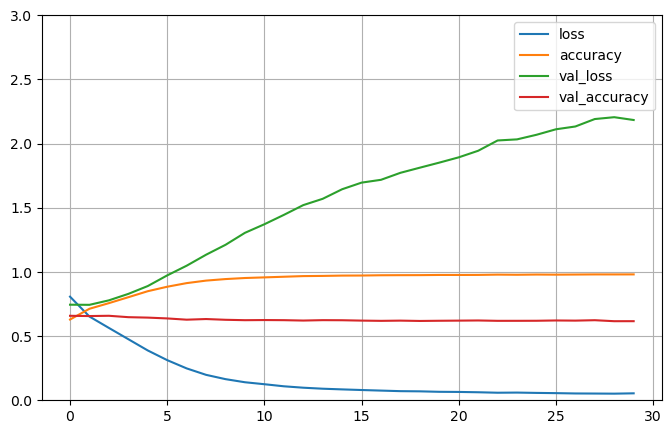

In [112]:
import matplotlib.pyplot as plt

pd.DataFrame(mlp_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,3)
plt.show()